In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
def getData(files):
    f = open("data/"+str(files), "r")
    f1 = f.readlines()
    del f1[0:4]
    a = np.asarray(f1)
    table = []
    for i in range(0, len(a)):
        b = a[i][0:-1].split('\t')
        c = map(float, b[0:6])
        d = np.asarray(c)
        table.append(d)
    table = np.asarray(table)
    pd.set_option('display.float_format', lambda x: '%.6e' % x)
    df = pd.DataFrame(table, columns=['t1', 'v1', 'w1', 't2', 'v2', 'w2'])
    return df

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [4]:
df = getData('MUO_long.dat')

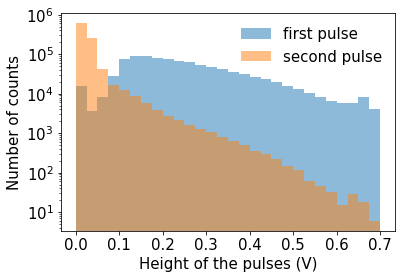

In [5]:
plt.hist(df['v1'], bins=28, range=(0,0.7), alpha=0.5, label='first pulse')
plt.hist(df['v2'], bins=28, range=(0,0.7), alpha=0.5, label='second pulse')
plt.xlabel('Height of the pulses (V)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.legend(prop={'size': 15}, frameon=False, loc='best')

In [6]:
df.eval('dt = t2 - t1', inplace=True)

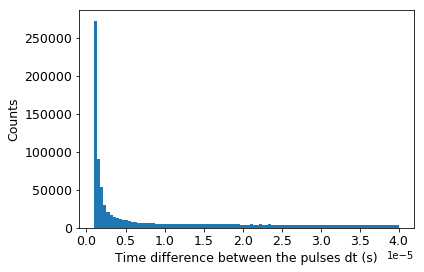

In [7]:
plt.hist(df['dt'], bins = 100, range=(1e-6, 4e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.ylabel('Counts', fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

Text(0.5,1,'No cut')

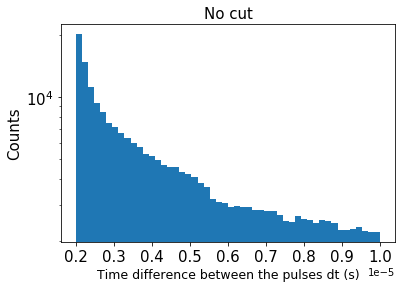

In [9]:
plt.hist(df['dt'], bins = 50, range=(2e-6, 1e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
plt.title('No cut', fontsize=15)

In [10]:
df1 = applyCut(df, 'v1 > 0.05', 'v1 > 0.05')
df1 = applyCut(df1, 'v2 > 0.05', 'v2 > 0.05')

v1 > 0.05 940307  fraction kept: 98.0
v2 > 0.05 82487  fraction kept: 8.8


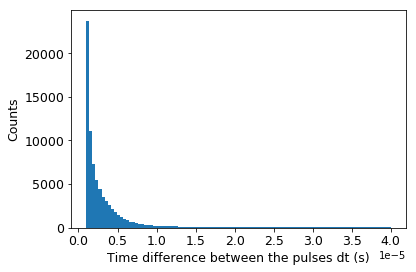

In [14]:
plt.hist(df1['dt'], bins = 100, range=(1e-6, 4e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.ylabel('Counts', fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

Text(0.5,1,'Cuts: $V_1, V_2 > 0.05 V$')

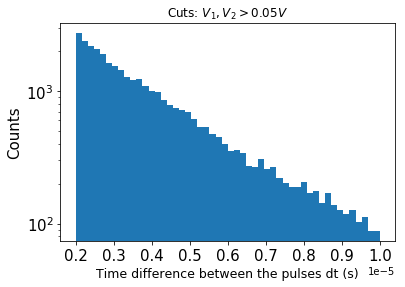

In [11]:
plt.hist(df1['dt'], bins = 50, range=(2e-6, 1e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
plt.title('Cuts: $V_1, V_2 > 0.05 V$')

Text(0.5,1,'Background, with cuts: $V_1, V_2 > 0.05 V$')

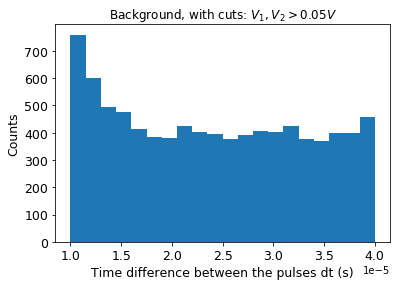

In [13]:
plt.hist(df1['dt'], bins = 20, range=(1e-5, 4e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.ylabel('Counts', fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Background, with cuts: $V_1, V_2 > 0.05 V$')

In [18]:
df2 = applyCut(df, 'v1 > 0.1', 'v1 > 0.1')
df2 = applyCut(df2, 'v2 > 0.1', 'v2 > 0.1')

v1 > 0.1 903126  fraction kept: 94.1
v2 > 0.1 23119  fraction kept: 2.6


Text(0.5,1,'Cuts: $V_1, V_2 > 0.1 V$')

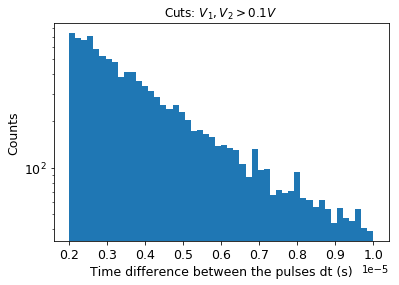

In [19]:
plt.hist(df2['dt'], bins = 50, range=(2e-6, 1e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.ylabel('Counts', fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
plt.title('Cuts: $V_1, V_2 > 0.1 V$')

In [20]:
df3 = applyCut(df, 'v1 > 0.2', 'v1 > 0.2')
df3 = applyCut(df3, 'v2 > 0.2', 'v2 > 0.2')

v1 > 0.2 565593  fraction kept: 58.9
v2 > 0.2 2129  fraction kept: 0.4


Text(0.5,1,'Cuts: $V_1, V_2 > 0.2 V$')

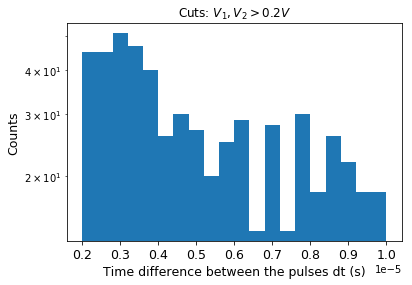

In [21]:
plt.hist(df3['dt'], bins = 20, range=(2e-6, 1e-5))
plt.xlabel('Time difference between the pulses dt (s)', fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.ylabel('Counts', fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')
plt.title('Cuts: $V_1, V_2 > 0.2 V$')